In [1]:
import os
os.chdir('/home/jaentrouble/hrnet_pretrain')
print(os.getcwd())

/home/jaentrouble/hrnet_pretrain


In [2]:
%matplotlib inline

In [3]:
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
Unpacking objects:  50% (4/8)remote: Total 8 (delta 3), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (8/8), 524.04 KiB | 641.00 KiB/s, done.
From https://github.com/jaentrouble/hrnet_pretrain
   bd6ba3b..a7231d1  master     -> origin/master
Updating bd6ba3b..a7231d1
Fast-forward
 check_dataset.ipynb   |   6 +--
 extractidtoname.ipynb | 120 ++++++++++++++++++++++++++++++++++++++++++++++++++
 id_to_name.json       |   1 +
 model_trainer.py      |   6 +--
 4 files changed, 127 insertions(+), 6 deletions(-)
 create mode 100644 extractidtoname.ipynb
 create mode 100644 id_to_name.json


In [4]:
from model_trainer import create_train_dataset

In [5]:
img_dir = '/home/jaentrouble/data/imagenet/train'
img_names = os.listdir(img_dir)

In [6]:
import json

In [7]:
with open('meta.json','r') as f:
    label_dict=json.load(f)

In [8]:
with open('id_to_name.json','r') as f:
    names = json.load(f)

In [9]:
img_size = (240,320)
ds = create_train_dataset(
    img_dir,
    img_names,
    label_dict,
    img_size,
    32,
    buffer_size=1000,
)

In [13]:
sample = ds.take(5).as_numpy_iterator()

In [11]:
import matplotlib.pyplot as plt

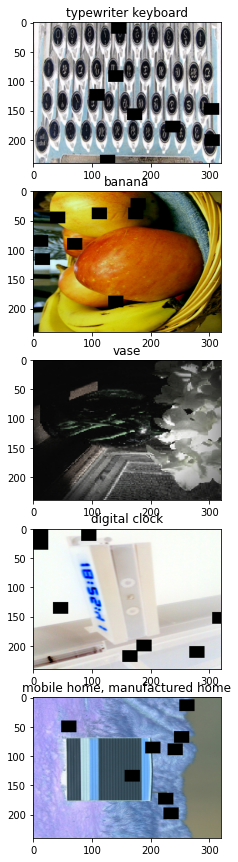

In [14]:
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(names[s[1][0]])
plt.show()